## Market Segmentation with Cluster Analysis

* Importing relevant libraries

In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

In [58]:
data = pd.read_csv('11.2 3.12. Market Segmentation.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Text(0.5, 1.0, 'Satisfaction - Loyalty plot')

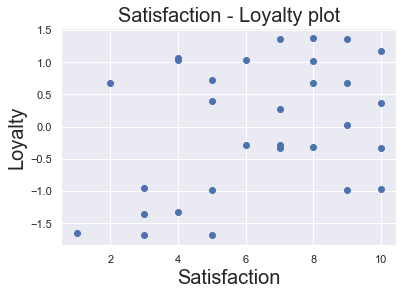

In [75]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)
plt.title('Satisfaction - Loyalty plot', fontsize=20)

Text(0.5, 1.0, 'Elbow Plot')

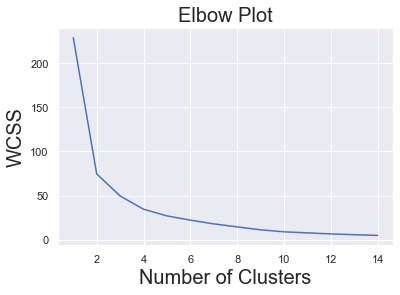

In [60]:
wcss = []
number_of_clusters = range(1, 15)
for number_of_cluster in number_of_clusters:
    kmeans = KMeans(number_of_cluster)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.title('Elbow Plot', fontsize=20)

In [61]:
kmeans = KMeans(5)
kmeans.fit(data)
identified_clusters = kmeans.fit_predict(data)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,4
1,6,-0.28,4
2,5,-0.99,4
3,7,-0.29,0
4,4,1.06,3


Text(0.5, 1.0, 'Satisfaction - Loyalty Clustered')

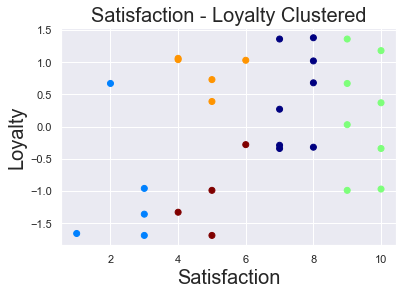

In [74]:
plt.scatter(data_with_clusters['Satisfaction'], data_with_clusters['Loyalty'], c=data_with_clusters['Clusters'], cmap='jet')
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)
plt.title('Satisfaction - Loyalty Clustered', fontsize=20)

* It seems that because of high values of satisfaction clustering doesn't make sense.
* So we should scale the satisfaction.

In [63]:
# importing relevant library
from sklearn.preprocessing import scale

In [64]:
scaled = scale(data)

* Elbow method

Text(0.5, 1.0, 'Elbow Plot')

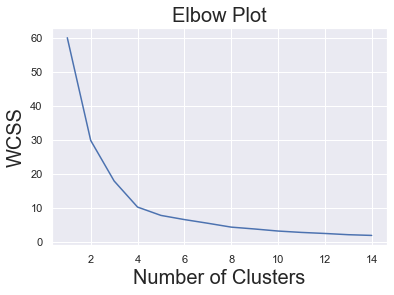

In [65]:
wcss = []
number_of_clusters = range(1, 15)
for number_of_cluster in number_of_clusters:
    kmeans = KMeans(number_of_cluster)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.title('Elbow Plot', fontsize=20)

In [66]:
kmeans = KMeans(5)
kmeans.fit(scaled)
identified_clusters = kmeans.fit_predict(scaled)
data_with_new_clusters = data.copy()
data_with_new_clusters['Clusters'] = identified_clusters
data_with_new_clusters.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,0
1,6,-0.28,4
2,5,-0.99,0
3,7,-0.29,4
4,4,1.06,2


Text(0.5, 1.0, 'Satisfaction - Loyalty Clustered')

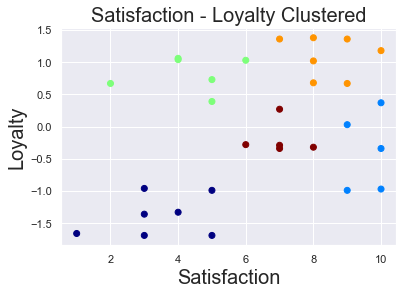

In [73]:
plt.scatter(data_with_new_clusters['Satisfaction'], data_with_new_clusters['Loyalty'], c=data_with_new_clusters['Clusters'], cmap='jet')
plt.xlabel('Satisfaction', fontsize=20)
plt.ylabel('Loyalty', fontsize=20)
plt.title('Satisfaction - Loyalty Clustered', fontsize=20)